# Calculate the coupling efficiency between a laser diode and a waveguide

The calculation of the coupling efficiency shown in this script is based on the information found [here](https://is.gd/XRjN6o)

## 1. Import all the necessary packages. The package efficiency containts the definitions of the classes: SquaredWaveguide, LaserDiode and Calculator

In [1]:
import efficiency as ef
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Ellipse

## 2. Create an instance of a waveguide with a square cross-section.

### Waveguide parameters

**n_core**: index of refraction of the waveguide's core.

**n_clad**: index of refraction of the waveguide's cladding.

**core_thickness**: thickness of the core layer. Units: um

**clad_thickness**: thickness of the cladding layer. Units: um

We create an instance of a a waveguide with a square cross-section which is stored in the variable waveguide1 with

```python
waveguide1 = efficiency.SquaredWaveguide(n_core, n_clad, core_thickness, clad_thickness)
```


In [2]:
# Here: a waveguide with core material AF32 glass (n=1.51) and cladding material SiO2 (n=1.465)
waveguide1 = ef.SquaredWaveguide(1.51, 1.465, 50, 1)
waveguide2 = ef.SquaredWaveguide(1.51, 1.465, 30, 1)

# make a list of the lasers so that we can iterate over them
waveguides = [waveguide1, waveguide2]
# select a waveguide
chosen_waveguide = waveguides[0]

# calculate the acceptance angle and print the resulting  value
theta_deg = np.rad2deg(chosen_waveguide.theta)
print(f"Waveguide's acceptance angle: theta = {theta_deg} deg")

# create an instance of a laser diode.

# Laser parameters
# --------------------
# lda: wavelength.
# fwhm_slow: Full width at half maximum on the slow axis. Units: deg
# fwhm_fast: Full width at half maximum on the fast axis. Units: deg
# width: width of the emitting surface. Units: um
# height: height of the emitting surface. Units: um

# we create an instance of a laser diode which is stored in the variable laser1 with
# laser1 = efficiency.LaserDiode(lda, fwhm_slow, fwhm_fast, width, height)

# Here: GNx blue laser diode
# laser1 = ef.LaserDiode(405,9,26,2,0.4)
laser1 = ef.LaserDiode(405, 9, 26)
# CHIP-980-P50 infrared
laser2 = ef.LaserDiode(980, 13, 30)
# 650nm Red Laser Diode Chips for DVD
laser3 = ef.LaserDiode(655, 8, 28)
# communications laser 1550nm wavelength
laser4 = ef.LaserDiode(1550, 9, 28)

# make a list of the lasers so that we can iterate over them
lasers = [laser1, laser2, laser3, laser4]
# pick laser by index on the laser list
chosen_laser = lasers[0]

print(f"Laser diode's power distribution coefficients: L = {chosen_laser.l_coefficient} and T = {chosen_laser.t_coefficient}")

# make an instance of the efficiency calculator. That is, we bring together the information of the laser
# diode and the waveguide, so that the program can calculate the coupling efficiency
calc = ef.Calculator(chosen_waveguide, chosen_laser)

# once we have the calculator instance we can calculate the coupling efficiency
# first, we select the separation distance
x = 5
# calculate efficiency factors
n_geom = calc.geometrical_losses(x)
n_fresnel = calc.fresnel_losses()
n_angular = calc.angular_losses()
# calculate total efficiency
n_total = calc.total_efficiency(x)

# print the results
print(f"The geometrical factor for coupling efficiency is: {n_geom} for a separation of x = {x} um")
print(f"The Fresnel factor for coupling efficiency is: {n_fresnel}")
print(f"The angular factor for coupling efficiency is: {n_angular}")
print(f"The total coupling efficiency at x = {x} is: {n_total}")

Waveguide's acceptance angle: theta = 21.46232368665197 deg
Laser diode's power distribution coefficients: L = 224.0 and T = 26.0
The geometrical factor for coupling efficiency is: 1 for a separation of x = 5 um
The Fresnel factor for coupling efficiency is: 0.9587149410326821
The angular factor for coupling efficiency is: 0.925386023742043
The total coupling efficiency at x = 5 is: 0.8871814071843209


Laser diode spot size at x = 5: 1.1354143834602242 um * 2.3313152890104694 um 


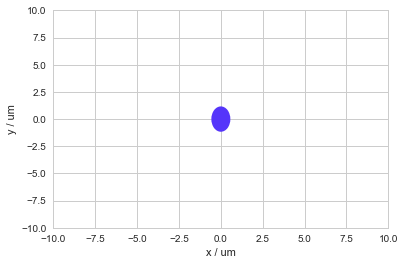

In [3]:
    # Besides calculating the total efficiency, we would like to get an idea of the size of the light spot on the
    # input surface of the waveguide. To do that, we first calculate and print this values and then we make a plot of
    # the corresponding ellipse.

    # calculate the values of the beam half width at a distance x and print the values
    wo_s, wo_f = chosen_laser.calculate_beam_width(x)
    print(f"Laser diode spot size at x = {x}: {wo_s} um * {wo_f} um ")

    # activate seaborn plotting (nicer plots)
    sns.set()
    sns.set_style("whitegrid")

    # plot the ellipse at the distance x to inspect the shape of the laser diode profile
    plt.figure()
    ax = plt.gca()
    # ax.set_xlim([-wo_s, wo_s])
    # ax.set_ylim([-wo_f, wo_f])
    ax.set_xlim([-10, 10])
    ax.set_ylim([-10, 10])
    plt.xlabel('x / um')
    plt.ylabel('y / um')

    # ellipse = Ellipse(xy=(0, 0), width=wo_s, height=wo_f,
    #                   edgecolor='b', fc='None', lw=2)
    ellipse = Ellipse(xy=(0, 0), width=wo_s, height=wo_f,
                      fc='None')
    ax.add_patch(ellipse)
    ellipse.set_facecolor(rnd.rand(3))

    plt.show()